## Data mining Project (Stroke Prediction)


Needed libraries

In [ ]:
# EDA and plotting libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

 load the dataset

In [ ]:
# Read the CSV file
csv_file_path = '/content/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(csv_file_path)
# Display the contents of the CSV file
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

#Data Preprocessing
Remove patients who are under 18 years old

In [ ]:
# Remove patients who are under 18 years old
df = df[df['age'] >= 18]
# Display the dataframe after removing underage patients
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[4254 rows x 12 columns]

In [ ]:
# Get the data types of each column
data_types = df.dtypes

# Display the data types
print(data_types)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [ ]:
# Print unique categories in string columns
unique_categories_gender = df['gender'].unique()
unique_categories_ever_married = df['ever_married'].unique()
unique_categories_work_type = df['work_type'].unique()
unique_categories_Residence_type = df['Residence_type'].unique()
unique_categories_smoking_status = df['smoking_status'].unique()
print('Unique categories in the "gender" column:', unique_categories_gender)
print('Unique categories in the "ever married" column:', unique_categories_ever_married)
print('Unique categories in the "work type" column:', unique_categories_work_type)
print('Unique categories in the "residence type" column:', unique_categories_Residence_type)
print('Unique categories in the "smoking status" column:', unique_categories_smoking_status)

Unique categories in the "gender" column: ['Male' 'Female' 'Other']
Unique categories in the "ever married" column: ['Yes' 'No']
Unique categories in the "work type" column: ['Private' 'Self-employed' 'Govt_job' 'Never_worked']
Unique categories in the "residence type" column: ['Urban' 'Rural']
Unique categories in the "smoking status" column: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
# Finding out which row is Other
df[df["gender"] == "Other"]

id gender   age  hypertension  heart_disease ever_married work_type  \
3116  56156  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0

In [ ]:

# Remove 'Other' from gender column
df = df.drop(df[df['gender'] == 'Other'].index)
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[4253 rows x 12 columns]

In [ ]:
# find number of null rows
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  181
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Mean of BMI in patients
df.bmi.mean()

30.434724950884085

In [ ]:
# fill out BMI null data with their mean BMI
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [ ]:
# find number of null rows
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Exploratory Data Analysis (EDA)


In [ ]:
# the number of stroke(1) v. non-stroke(0) patients in the dataset
df["stroke"].value_counts()

0    4006
1     247
Name: stroke, dtype: int64

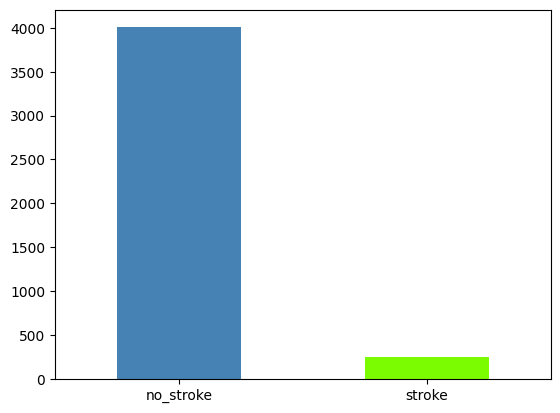

In [ ]:
# plot previous cell
st_plot = df["stroke"].value_counts().plot(kind="bar",color=["steelblue","lawngreen"], rot=0)
plt.xticks(ticks=[1,0], labels=["stroke", "no_stroke"]);

In [ ]:
# Comparing gender with target (stroke) column
pd.crosstab(df.stroke, df.gender)

gender  Female  Male
stroke              
0         2437  1569
1          139   108

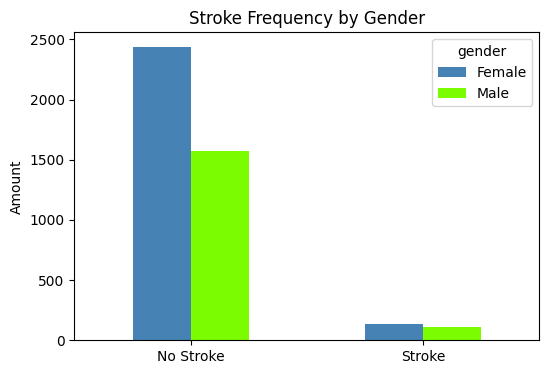

In [ ]:
# visualize the gender crosstab from above cell
pd.crosstab(df.stroke, df.gender).plot(kind='bar',
                                       figsize=(6,4),
                                       color=["steelblue","lawngreen"],
                                       rot=0)

# Styling
plt.title("Stroke Frequency by Gender")
plt.xticks(ticks=[0,1],labels=["No Stroke", "Stroke"])
plt.xlabel(None)
plt.ylabel("Amount");

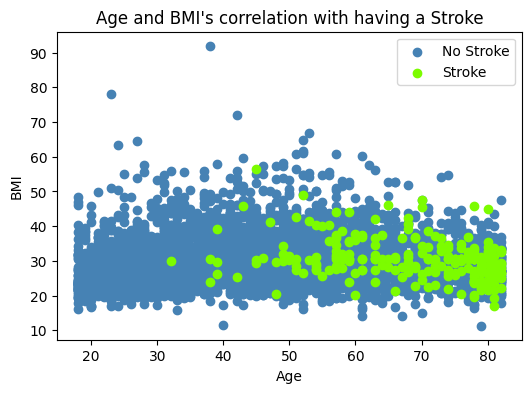

In [ ]:
plt.figure(figsize=(6,4))

# Ages and BMI for people who haven't had a stroke
plt.scatter(df.age[df.stroke==0],
            df.bmi[df.stroke==0],
            c="steelblue")

# Ages and BMI for people who have had a stroke
plt.scatter(df.age[df.stroke==1],
            df.bmi[df.stroke==1],
            c="lawngreen")

# Styling
plt.title("Age and BMI's correlation with having a Stroke")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(["No Stroke", "Stroke"]);

<ipython-input-19-beef7bac5564>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='avg_glucose_level', data=df[df.stroke==0], ax=ax1, shade=True, color='steelblue', alpha=1)
<ipython-input-19-beef7bac5564>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='avg_glucose_level', data=df[df.stroke==1], ax=ax1, shade=True, color='lawngreen', alpha=0.8)


Text(285, 0.014, 'No stroke')

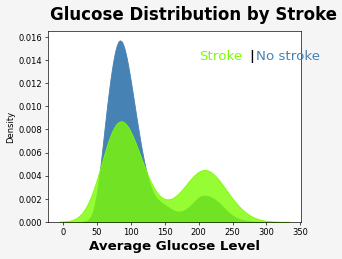

In [ ]:
from matplotlib.gridspec import GridSpec #data viz
fig = plt.figure(figsize = (24,10), dpi = 60)
gs = GridSpec(ncols=10, nrows=12, left=0.05, right=0.5, wspace=0.2, hspace=0.1)
fig.patch.set_facecolor('#f5f5f5')
sns.set_palette(sns.color_palette(['steelblue','lawngreen']))

ax1 = fig.add_subplot(gs[1:6, 0:4])
#-------Ax 1------------------------------------------------
sns.kdeplot(x='avg_glucose_level', data=df[df.stroke==0], ax=ax1, shade=True, color='steelblue', alpha=1)
sns.kdeplot(x='avg_glucose_level', data=df[df.stroke==1], ax=ax1, shade=True, color='lawngreen', alpha=0.8)
ax1.set_xlabel('Average Glucose Level', {'font':'cursive', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax1.text(-20, 0.0175, 'Glucose Distribution by Stroke', {'font':'cursive', 'size':'20','color': 'black','weight':'bold'})
ax1.text(200, 0.014,'Stroke', {'font':'cursive', 'fontsize':16, 'color':'lawngreen'})
ax1.text(275, 0.014,'|', {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})
ax1.text(285, 0.014,'No stroke', {'font':'cursive', 'fontsize':16, 'color':'steelblue'})

In [ ]:
# Creating a dataframe for understanding outliers
test = df[(df['bmi'] < 14) | (df['bmi'] > 80)]
test

id  gender   age  hypertension  heart_disease ever_married  \
2187  59993    Male  40.0             0              0          Yes   
3307   3205  Female  79.0             0              0          Yes   
4209  51856    Male  38.0             1              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi smoking_status  \
2187        Private          Rural              60.96  11.5   never smoked   
3307  Self-employed          Urban              79.03  11.3        Unknown   
4209        Private          Rural              56.90  92.0   never smoked   

      stroke  
2187       0  
3307       0  
4209       0

In [ ]:
# decide to remove previous outliers
df = df.drop(df[(df['bmi'] < 14) | (df['bmi'] > 80)].index)
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-employed          Rural             202.21  30.434725   
2           Private          Rural             105.92  32.500000   
3           Private          Urban             171.23  34.400000   
4     Self-employed          Rural             174.12  24.000000   
...             ...            ...                ...        ...   
5105        Private          Urban              83.75  30.434725   
5106  Self-employed          Urban             125.20  40.000000   
5107  Self-employed          Rural              82.99  30.600000   
5108        Private          Rural             166.29  25.600000   
5109       Govt_job          Urban              85.28  26.200000   

       smoking_status  stroke  
0     formerly smoked       1  
1        never smoked       1  
2        never smoked       1  
3              smokes       1  
4        never smoked       1  
...               ...     ...  
5105     never smoked       0  
5106     never smoked       0  
5107     never smoked       0  
5108  formerly smoked       0  
5109          Unknown       0  

[4250 rows x 12 columns]

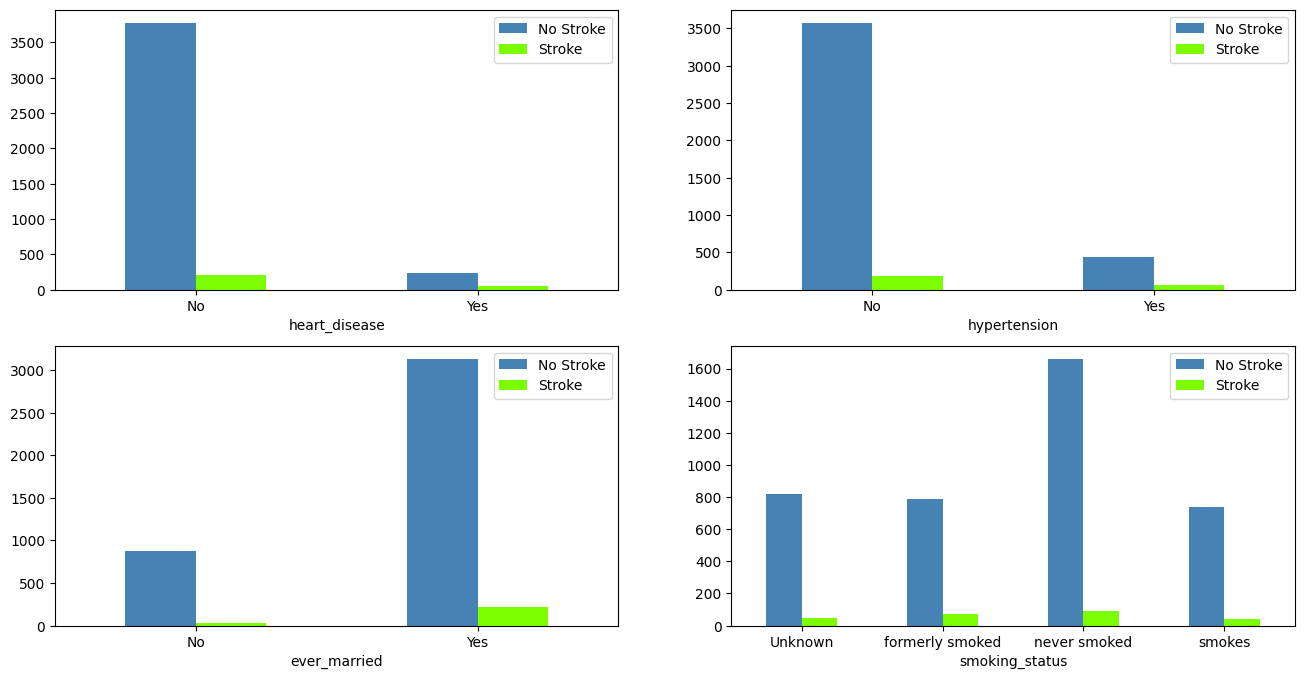

In [ ]:
# Creating some crosstab info for some of the remaining columns
ct1 = pd.crosstab(df.heart_disease,df.stroke)
ct2 = pd.crosstab(df.hypertension,df.stroke)
ct3 = pd.crosstab(df.ever_married,df.stroke)
ct4 = pd.crosstab(df.smoking_status,df.stroke)

# Setting the colors
colors = ["steelblue","lawngreen"]

# Setting up the figure and different axes on the figure
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                          ncols=2,
                                          figsize=(16,8))

# Plotting each crosstab on a different axis
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ct2.plot(kind='bar',ax=ax2,color=colors,rot=0)
ct3.plot(kind='bar',ax=ax3,color=colors,rot=0)
ct4.plot(kind='bar',ax=ax4,color=colors,rot=0);
# Setting x labels for heart_disease and hypertension
ax1.set_xticklabels(["No","Yes"])
ax2.set_xticklabels(["No","Yes"])

# Changing the lables of the legend
ax1.legend(labels=['No Stroke', 'Stroke'])
ax2.legend(labels=['No Stroke', 'Stroke'])
ax3.legend(labels=['No Stroke', 'Stroke'])
ax4.legend(labels=['No Stroke', 'Stroke']);


In [ ]:
# Making our correlation matrix
df.corr()

<ipython-input-23-a134915ee7af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


id       age  hypertension  heart_disease  \
id                 1.000000 -0.003005      0.001469      -0.003654   
age               -0.003005  1.000000      0.248361       0.268905   
hypertension       0.001469  0.248361      1.000000       0.095047   
heart_disease     -0.003654  0.268905      0.095047       1.000000   
avg_glucose_level -0.004455  0.227963      0.166937       0.157208   
bmi               -0.006048  0.033960      0.109573      -0.003575   
stroke             0.004005  0.250965      0.116438       0.126801   

                   avg_glucose_level       bmi    stroke  
id                         -0.004455 -0.006048  0.004005  
age                         0.227963  0.033960  0.250965  
hypertension                0.166937  0.109573  0.116438  
heart_disease               0.157208 -0.003575  0.126801  
avg_glucose_level           1.000000  0.153891  0.127725  
bmi                         0.153891  1.000000  0.001226  
stroke                      0.127725  0.001226  1.000000

<ipython-input-24-898789feab19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


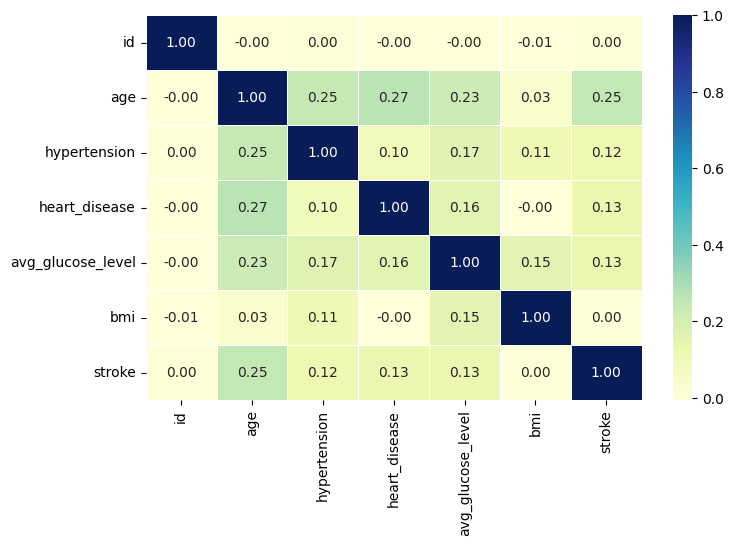

In [ ]:
# make the correlation matrix into a heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu"
                );

In [ ]:
import plotly.express as px

fig = px.histogram(df,
                   x='work_type',
                   barmode='group',
                   color='stroke',
                   color_discrete_map = {0:'steelblue',1:'lawngreen'},
                   text_auto=True,
                   labels={
                       'work_type': 'Work Type',
                       'count': 'No. of People'
                   },
                   )

fig.update_layout(yaxis_title="Number of  People")

fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor='right', x=0.99))
# fig.update_layout(xaxis=dict(showgrid=False),
#               yaxis=dict(showgrid=False)
# )
fig.update_layout(font_color='black',
                  legend_title_font_color="deeppink",
                  yaxis=dict(tickfont=dict(size=15), titlefont=dict(size=15)),
                  xaxis=dict(tickfont=dict(size=15), titlefont=dict(size=15)),
                  legend_font_size=15)

# Changing the label names in the legend -
newnames = {'0': 'No', '1': 'Yes'}
fig.for_each_trace(lambda t: t.update(name=newnames[t.name],
                                      legendgroup=newnames[t.name],
                                      hovertemplate=t.hovertemplate.replace(
                                          t.name, newnames[t.name])))

fig.show()

<ipython-input-26-ff3cb4d7925f>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-26-ff3cb4d7925f>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-26-ff3cb4d7925f>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

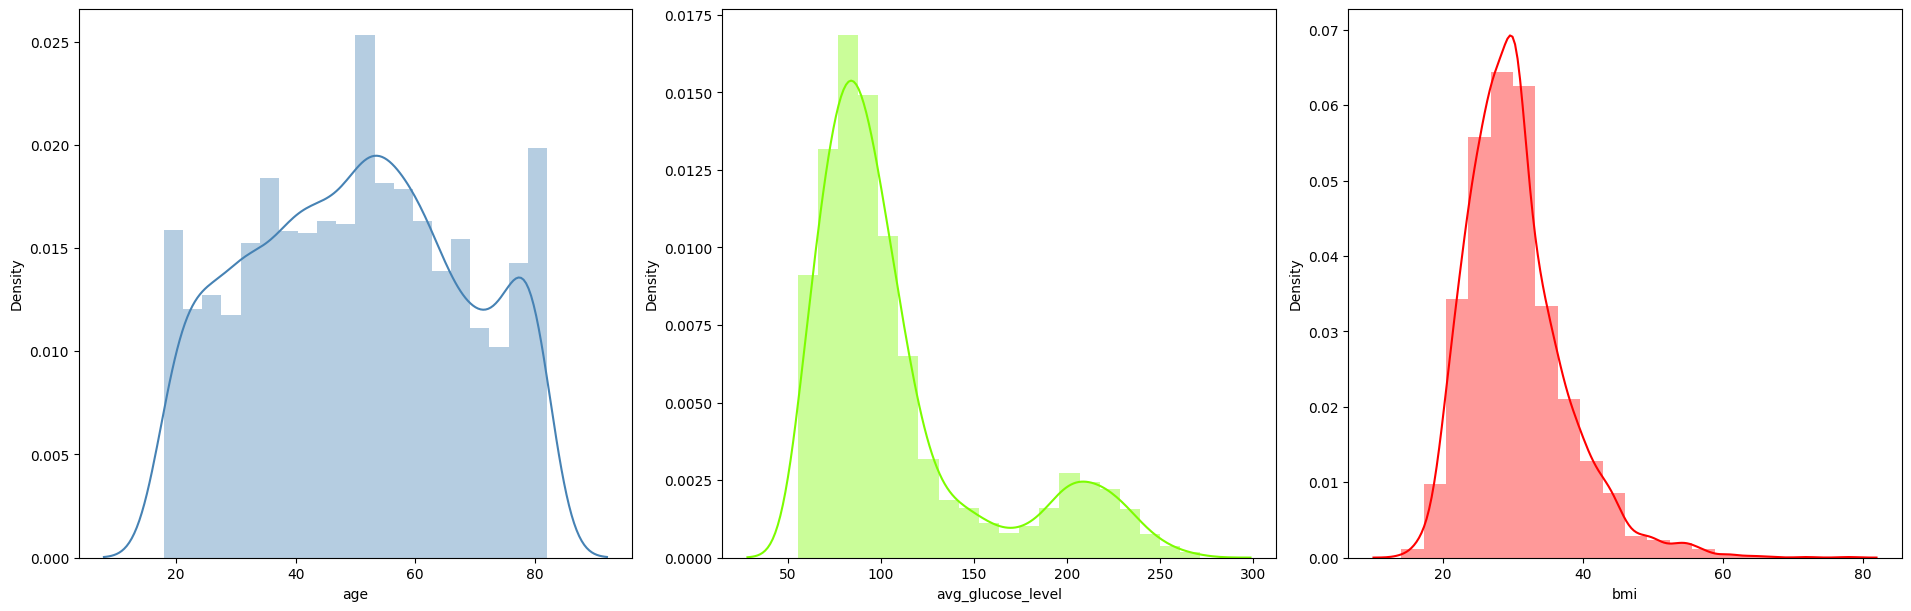

In [ ]:
# Distribution Plots for Numeric Features0
f,ax=plt.subplots(1,3,figsize=(19,6),constrained_layout = True, squeeze=False)
sns.distplot(df["age"],bins=20,ax=ax[0,0],color='steelblue');

sns.distplot(df["avg_glucose_level"],bins=20,ax=ax[0,1],color='lawngreen');

sns.distplot(df["bmi"],bins=20,ax=ax[0,2],color='red');
sns.set(font_scale=2)

In [ ]:
#convert categorical variables to dummy variables
df.replace({'gender':{'Female':0,"Male":1}},inplace=True)
df.replace({'ever_married':{'Yes':1,'No':0}},inplace=True)
df.replace({'Residence_type':{'Urban':1,'Rural':0}},inplace=True)
df=pd.get_dummies(df, columns=['work_type'], prefix="work_type", drop_first=False)
df=pd.get_dummies(df, columns=['smoking_status'], prefix="smoking_status", drop_first=False)
df

id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0             0              0             1   

      Residence_type  avg_glucose_level        bmi  stroke  \
0                  1             228.69  36.600000       1   
1                  0             202.21  30.434725       1   
2                  0             105.92  32.500000       1   
3                  1             171.23  34.400000       1   
4                  0             174.12  24.000000       1   
...              ...                ...        ...     ...   
5105               1              83.75  30.434725       0   
5106               1             125.20  40.000000       0   
5107               0              82.99  30.600000       0   
5108               0             166.29  25.600000       0   
5109               1              85.28  26.200000       0   

      work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                      0                       0                  1   
1                      0                       0                  0   
2                      0                       0                  1   
3                      0                       0                  1   
4                      0                       0                  0   
...                  ...                     ...                ...   
5105                   0                       0                  1   
5106                   0                       0                  0   
5107                   0                       0                  0   
5108                   0                       0                  1   
5109                   1                       0                  0   

      work_type_Self-employed  smoking_status_Unknown  \
0                           0                       0   
1                           1                       0   
2                           0                       0   
3                           0                       0   
4                           1                       0   
...                       ...                     ...   
5105                        0                       0   
5106                        1                       0   
5107                        1                       0   
5108                        0                       0   
5109                        0                       1   

      smoking_status_formerly smoked  smoking_status_never smoked  \
0                                  1                            0   
1                                  0                            1   
2                                  0                            1   
3                                  0                            0   
4                                  0                            1   
...                              ...                          ...   
5105                               0                            1   
5106                               0                            1   
5107                               0                            1   
5108                               1                            0   
5109                               0                            0   

      smoking_status_smokes  
0 

In [ ]:
# Drop the 'id' column
df = df.drop('id', axis=1)
df

gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0          1  67.0             0              1             1               1   
1          0  61.0             0              0             1               0   
2          1  80.0             0              1             1               0   
3          0  49.0             0              0             1               1   
4          0  79.0             1              0             1               0   
...      ...   ...           ...            ...           ...             ...   
5105       0  80.0             1              0             1               1   
5106       0  81.0             0              0             1               1   
5107       0  35.0             0              0             1               0   
5108       1  51.0             0              0             1               0   
5109       0  44.0             0              0             1               1   

      avg_glucose_level        bmi  stroke  work_type_Govt_job  \
0                228.69  36.600000       1                   0   
1                202.21  30.434725       1                   0   
2                105.92  32.500000       1                   0   
3                171.23  34.400000       1                   0   
4                174.12  24.000000       1                   0   
...                 ...        ...     ...                 ...   
5105              83.75  30.434725       0                   0   
5106             125.20  40.000000       0                   0   
5107              82.99  30.600000       0                   0   
5108             166.29  25.600000       0                   0   
5109              85.28  26.200000       0                   1   

      work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                          0                  1                        0   
1                          0                  0                        1   
2                          0                  1                        0   
3                          0                  1                        0   
4                          0                  0                        1   
...                      ...                ...                      ...   
5105                       0                  1                        0   
5106                       0                  0                        1   
5107                       0                  0                        1   
5108                       0                  1                        0   
5109                       0                  0                        0   

      smoking_status_Unknown  smoking_status_formerly smoked  \
0                          0                               1   
1                          0                               0   
2                          0                               0   
3                          0                               0   
4                          0                               0   
...                      ...                             ...   
5105                       0                               0   
5106                       0                               0   
5107                       0                               0   
5108                       0                               1   
5109                       1                               0   

      smoking_status_never smoked  smoking_status_smokes  
0                               0                      0  
1                               1                      0  
2                               1                      0  
3                               0                      1  
4                               1                      0  
...                           ...                    ...  
5105                            1                      0  
5106                            1                      0  
5107                       

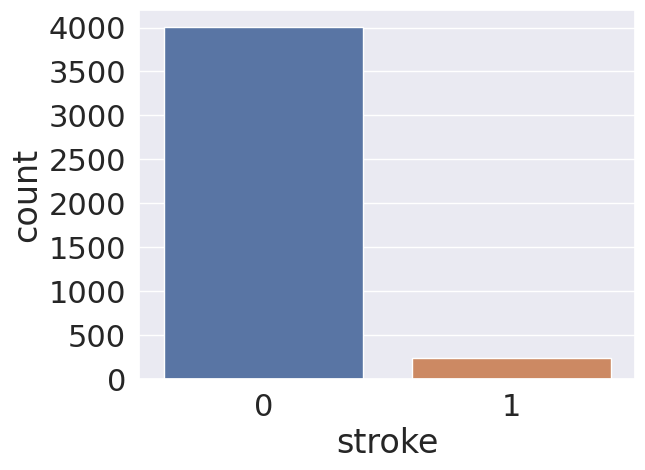

In [ ]:
# class distribution before SMOTE
sns.countplot(data=df, x='stroke');
sns.set(font_scale=1)

# Machine Learning Modeling

Applying SMOTE Technique to Resolve Unbalanced 'stroke' Feature

In [ ]:
from imblearn.over_sampling import SMOTE
# Define x , y as input, output

X=df.drop(['stroke'],axis=1)
y=df['stroke']

print("Before Oversampling, the counts of label 1: ", y.value_counts()[1])
print("Before Oversampling, the counts of label 0: ", y.value_counts()[0])

smote = SMOTE(random_state = 2)
X_res, y_res = smote.fit_resample(X, y)

print("After Oversampling, the counts of label 1: ", y_res.value_counts()[1])
print("After Oversampling, the counts of label 0: ", y_res.value_counts()[0])

Before Oversampling, the counts of label 1:  247
Before Oversampling, the counts of label 0:  4003
After Oversampling, the counts of label 1:  4003
After Oversampling, the counts of label 0:  4003


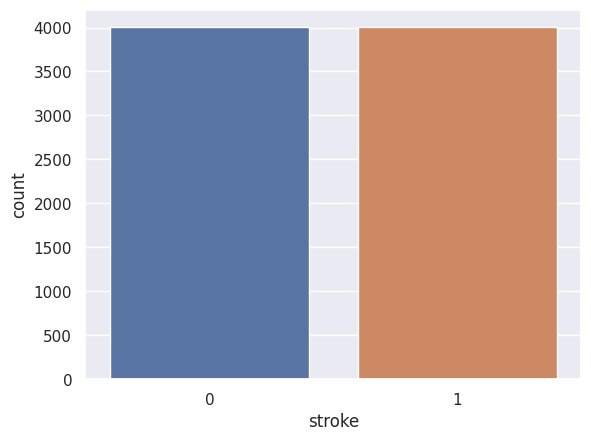

In [ ]:
# class distribution after SMOTE
y_res_df = y_res.to_frame()
sns.countplot(data=y_res_df, x='stroke');
sns.set(font_scale=1)

Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

Feature Scaling

In [ ]:
# Scaling features between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 1) KNN Model & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# define parameter settings to be tested
K_values = [3, 5, 7, 9]
metric= ['euclidean', 'manhattan', 'chebyshev','minkowski']
# perform 5-fold cross validation for each parameter setting of K and metric
for K in K_values:
    for m in metric:
        knn = KNeighborsClassifier(n_neighbors=K, metric=m)
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        print(f'K={K}, metric={m}, 5-Fold Cross Validation Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

        # train the KNN model on the full training data
        knn.fit(X_train, y_train)

        # evaluate the model on the test data
        y_pred = knn.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        balanced_accuracy = (tp / (tp + fn) + tn / (tn + fp)) / 2
        precision = tp / (tp + fp)
        f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

        print(f'K={K}, metric={m}, Test Set Metrics:')
        print(f'Accuracy: {accuracy:.3f}')
        print(f'Sensitivity (Recall): {sensitivity:.3f}')
        print(f'Specificity: {specificity:.3f}')
        print(f'Balanced Accuracy: {balanced_accuracy:.3f}')
        print(f'Precision: {precision:.3f}')
        print(f'F1-score: {f1_score:.3f}')
        print(f'Confusion Matrix:\n{cm}\n')
        print("--------------------------------------------------------")


K=3, metric=euclidean, 5-Fold Cross Validation Accuracy: 0.942 (+/- 0.004)
K=3, metric=euclidean, Test Set Metrics:
Accuracy: 0.940
Sensitivity (Recall): 0.939
Specificity: 0.941
Balanced Accuracy: 0.940
Precision: 0.941
F1-score: 0.940
Confusion Matrix:
[[944  59]
 [ 61 938]]

--------------------------------------------------------
K=3, metric=manhattan, 5-Fold Cross Validation Accuracy: 0.945 (+/- 0.009)
K=3, metric=manhattan, Test Set Metrics:
Accuracy: 0.938
Sensitivity (Recall): 0.945
Specificity: 0.931
Balanced Accuracy: 0.938
Precision: 0.932
F1-score: 0.938
Confusion Matrix:
[[934  69]
 [ 55 944]]

--------------------------------------------------------
K=3, metric=chebyshev, 5-Fold Cross Validation Accuracy: 0.941 (+/- 0.006)
K=3, metric=chebyshev, Test Set Metrics:
Accuracy: 0.943
Sensitivity (Recall): 0.938
Specificity: 0.947
Balanced Accuracy: 0.943
Precision: 0.946
F1-score: 0.942
Confusion Matrix:
[[950  53]
 [ 62 937]]

-------------------------------------------------

### Based on classification metrics, k=3 and metric = chebyshev, has the best performance and selected as the best KNN model
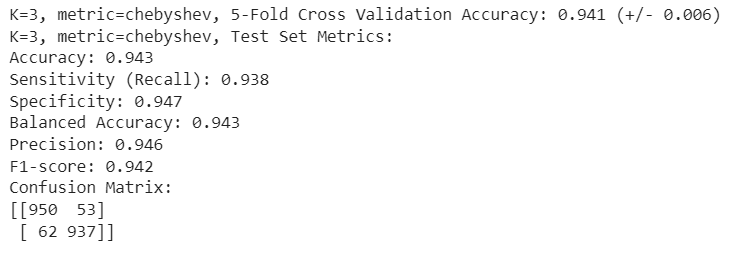

## 2) Decision Tree Model & Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Define parameter settings to explore
criterion = ["gini", "entropy", "log_loss"]
max_depth = [5, 10, 20]
max_features = ["sqrt", "log2", None]

# Loop over different settings and perform 5-fold cross-validation on each
for crit in criterion:
    for depth in max_depth:
        for feat in max_features:
            # Build decision tree classifier with current settings
            tree = DecisionTreeClassifier(criterion=crit, max_depth=depth, max_features=feat, random_state=42)

            # Perform 5-fold cross-validation and report classification metrics
            scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
            print("Criterion:", crit, "| Max depth:", depth, "| Max features:", feat)
            print("Cross-validation accuracy scores:", scores)
            print("Mean accuracy:", scores.mean())
            tree.fit(X_train, y_train)
            y_pred = tree.predict(X_test)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            accuracy = accuracy_score(y_test, y_pred)
            sensitivity = recall_score(y_test, y_pred)
            specificity = tn / (tn + fp)
            balanced_accuracy = (sensitivity + specificity) / 2
            precision = precision_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            print("Accuracy:", accuracy)
            print("Sensitivity:", sensitivity)
            print("Specificity:", specificity)
            print("Balanced accuracy:", balanced_accuracy)
            print("Precision:", precision)
            print("F1 score:", f1)
            print("Confusion matrix:")
            print(confusion_matrix(y_test, y_pred))
            print("--------------------------------------------------------")

Criterion: gini | Max depth: 5 | Max features: sqrt
Cross-validation accuracy scores: [0.78517902 0.79433805 0.78517902 0.78850958 0.78166667]
Mean accuracy: 0.7869744657230087
Accuracy: 0.7807192807192808
Sensitivity: 0.8738738738738738
Specificity: 0.6879361914257228
Balanced accuracy: 0.7809050326497984
Precision: 0.7360876897133221
F1 score: 0.7990846681922198
Confusion matrix:
[[690 313]
 [126 873]]
--------------------------------------------------------
Criterion: gini | Max depth: 5 | Max features: log2
Cross-validation accuracy scores: [0.78517902 0.79433805 0.78517902 0.78850958 0.78166667]
Mean accuracy: 0.7869744657230087
Accuracy: 0.7807192807192808
Sensitivity: 0.8738738738738738
Specificity: 0.6879361914257228
Balanced accuracy: 0.7809050326497984
Precision: 0.7360876897133221
F1 score: 0.7990846681922198
Confusion matrix:
[[690 313]
 [126 873]]
--------------------------------------------------------
Criterion: gini | Max depth: 5 | Max features: None
Cross-validation a

### Based on classification metrics, criterion: gini, max depth: 20, and max features: sqrt has the best performance and selected as the best Decision Tree model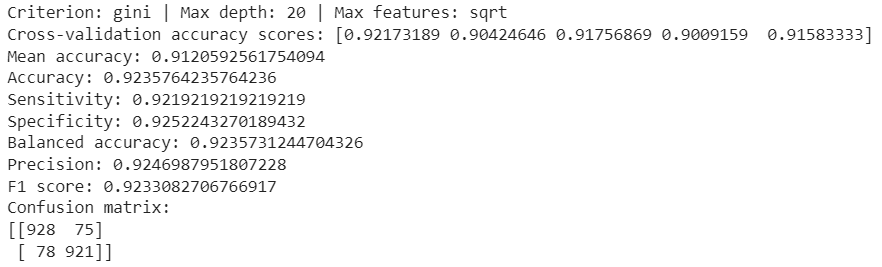

#### 2.4: Visualize the best decision tree

In [ ]:
from math import sqrt
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

# Create a decision tree classifier with gini criterion, max depth of 5, and no limit on max features
clf = DecisionTreeClassifier(criterion='gini', max_depth=20, max_features='sqrt', random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Plot the decision tree
dot_data = export_graphviz(clf, out_file=None)

# Display the decision tree using Graphviz
graph = graphviz.Source(dot_data)
graph.render('treeplot1',format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.975644 to fit


'treeplot1.png'

treeplot1 (3).png

## 3) Random Forest Model & Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Define parameter settings to explore
criterion = ["gini", "entropy", "log_loss"]
n_estimators = [100, 200, 300]
max_features = ["sqrt", "log2", None]

# Loop over different settings and perform 5-fold cross-validation on each
for crit in criterion:
    for n in n_estimators:
        for feat in max_features:
            # Build Random Forest classifier with current settings
            clf = RandomForestClassifier(criterion=crit, n_estimators=n, max_features=feat, random_state=42)

            # Perform 5-fold cross-validation and report classification metrics
            scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
            print("Criterion:", crit, "| n_estimators:", n, "| Max features:", feat)
            print("Cross-validation accuracy scores:", scores)
            print("Mean accuracy:", scores.mean())
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            accuracy = accuracy_score(y_test, y_pred)
            sensitivity = recall_score(y_test, y_pred)
            specificity = tn / (tn + fp)
            balanced_accuracy = (sensitivity + specificity) / 2
            precision = precision_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            print("Accuracy:", accuracy)
            print("Sensitivity:", sensitivity)
            print("Specificity:", specificity)
            print("Balanced accuracy:", balanced_accuracy)
            print("Precision:", precision)
            print("F1 score:", f1)
            print("Confusion matrix:")
            print(confusion_matrix(y_test, y_pred))
            print("--------------------------------------------------------")

Criterion: gini | n_estimators: 100 | Max features: sqrt
Cross-validation accuracy scores: [0.96253122 0.95836803 0.96253122 0.95836803 0.95916667]
Mean accuracy: 0.9601930335831252
Accuracy: 0.957042957042957
Sensitivity: 0.943943943943944
Specificity: 0.9700897308075773
Balanced accuracy: 0.9570168373757606
Precision: 0.9691675231243576
F1 score: 0.9563894523326572
Confusion matrix:
[[973  30]
 [ 56 943]]
--------------------------------------------------------
Criterion: gini | n_estimators: 100 | Max features: log2
Cross-validation accuracy scores: [0.96253122 0.95836803 0.96253122 0.95836803 0.95916667]
Mean accuracy: 0.9601930335831252
Accuracy: 0.957042957042957
Sensitivity: 0.943943943943944
Specificity: 0.9700897308075773
Balanced accuracy: 0.9570168373757606
Precision: 0.9691675231243576
F1 score: 0.9563894523326572
Confusion matrix:
[[973  30]
 [ 56 943]]
--------------------------------------------------------
Criterion: gini | n_estimators: 100 | Max features: None
Cross-v

### Based on classification metrics, criterion: gini, n_estimators: 200, and max features: sqrt has the best performance and selected as the best Random Forest model
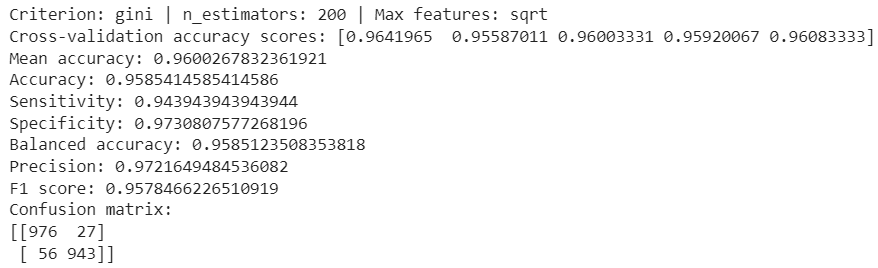

## 4) SVM Model & Hyperparameter Tuning

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Define parameter settings to explore
C = [0.3, 0.7, 1]
gamma = ['scale', 'auto']

# Loop over different settings and perform 5-fold cross-validation on each
for i in C:
    for g in gamma:
      # Build support vector classifier with current settings
      clf = SVC(C=i, gamma=g, random_state=42)
      # Perform 5-fold cross-validation and report classification metrics
      scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
      print("C:", i, "| gamma:", g)
      print("Cross-validation accuracy scores:", scores)
      print("Mean accuracy:", scores.mean())
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
      accuracy = accuracy_score(y_test, y_pred)
      sensitivity = recall_score(y_test, y_pred)
      specificity = tn / (tn + fp)
      balanced_accuracy = (sensitivity + specificity) / 2
      precision = precision_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      print("Accuracy:", accuracy)
      print("Sensitivity:", sensitivity)
      print("Specificity:", specificity)
      print("Balanced accuracy:", balanced_accuracy)
      print("Precision:", precision)
      print("F1 score:", f1)
      print("Confusion matrix:")
      print(confusion_matrix(y_test, y_pred))
      print("--------------------------------------------------------")

C: 0.3 | gamma: scale
Cross-validation accuracy scores: [0.92922565 0.91840133 0.93172356 0.91007494 0.93      ]
Mean accuracy: 0.9238850957535387
Accuracy: 0.9315684315684316
Sensitivity: 0.8768768768768769
Specificity: 0.9860418743768694
Balanced accuracy: 0.9314593756268732
Precision: 0.9842696629213483
F1 score: 0.9274748544203283
Confusion matrix:
[[989  14]
 [123 876]]
--------------------------------------------------------
C: 0.3 | gamma: auto
Cross-validation accuracy scores: [0.92922565 0.91840133 0.93172356 0.91007494 0.93      ]
Mean accuracy: 0.9238850957535387
Accuracy: 0.9315684315684316
Sensitivity: 0.8768768768768769
Specificity: 0.9860418743768694
Balanced accuracy: 0.9314593756268732
Precision: 0.9842696629213483
F1 score: 0.9274748544203283
Confusion matrix:
[[989  14]
 [123 876]]
--------------------------------------------------------
C: 0.7 | gamma: scale
Cross-validation accuracy scores: [0.93505412 0.92422981 0.93089092 0.92089925 0.93083333]
Mean accuracy: 0.9

### Based on classification metrics, C: 0.3 and gamma: scale has the best performance and selected as the best SVM model
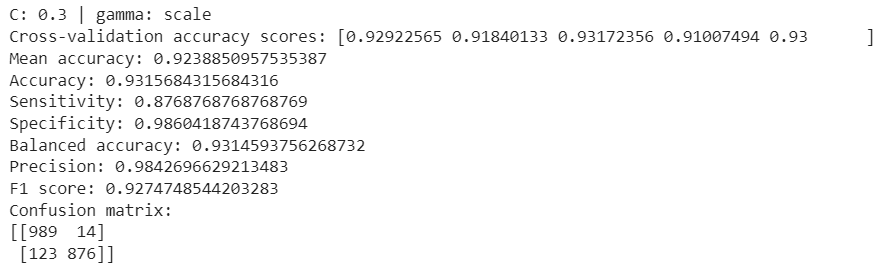

## 5) Neural Network (MLP) & Hyperparameter Tuning

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Create MLP classifier
mlp = MLPClassifier(random_state=42)

# Define hyperparameters to tune
parameters = {'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
              'max_iter': [50],
              'activation': ['relu', 'tanh'],
              'solver': ['adam', 'sgd'],
              'learning_rate': ['constant', 'adaptive']}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(mlp, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)

# Predict the test set
y_pred = grid_search.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print("Specificity: ", specificity)

recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-score: ", f1_score)

balanced_accuracy = (specificity + recall) / 2
print("Balanced Accuracy: ", balanced_accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum ite

Best parameters:  {'activation': 'relu', 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'adam'}
Accuracy:  0.938061938061938
Confusion Matrix:
 [[959  44]
 [ 80 919]]
Specificity:  0.9561316051844466
Recall:  0.91991991991992
Precision:  0.9543094496365524
F1-score:  0.9367991845056065
Balanced Accuracy:  0.9380257625521833
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1003
           1       0.95      0.92      0.94       999

    accuracy                           0.94      2002
   macro avg       0.94      0.94      0.94      2002
weighted avg       0.94      0.94      0.94      2002



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.



### The best MLP parameters:
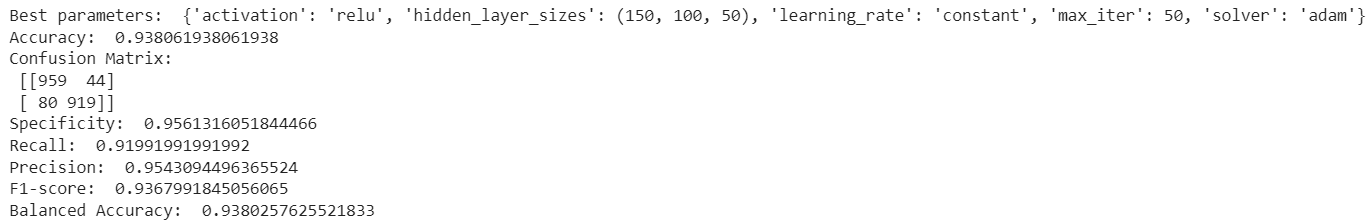

### Based on classification metrics, Random Forest has the best performance and selected as the best model
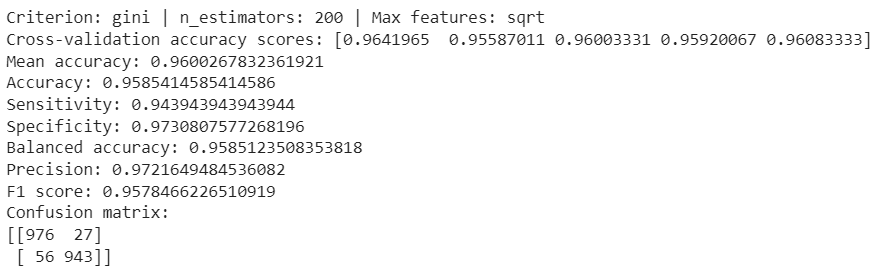

## Feature importance plot for Random Forest Classifier

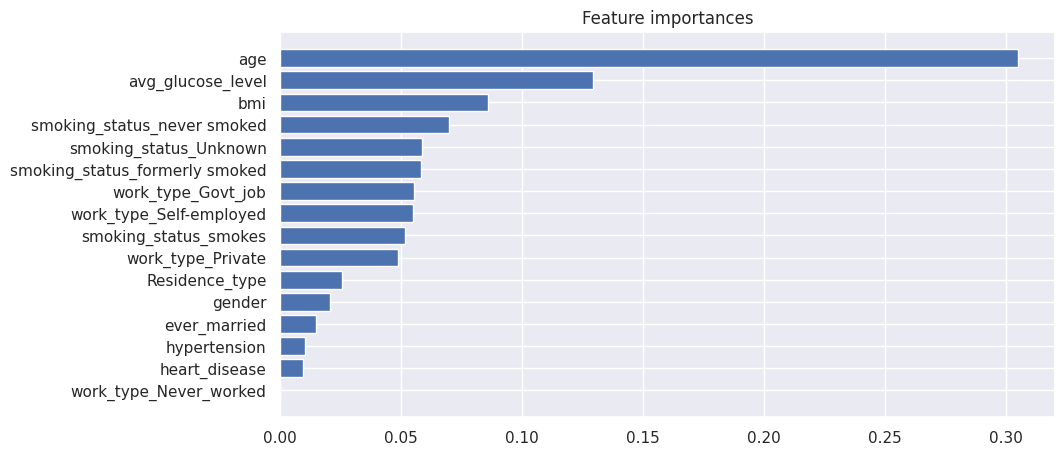

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini', n_estimators=200, max_features='sqrt', random_state=42)
clf.fit(X_train, y_train)
column_names = df.drop(columns=['stroke']).columns.tolist()
# get feature importances
importances = clf.feature_importances_

# create a list of tuples containing the column names and the feature importances
features = list(zip(column_names, importances))

# sort the features in descending order of importance
features.sort(key=lambda x: x[1], reverse=True)
# plot feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.barh([x[0] for x in reversed(features)], [x[1] for x in reversed(features)])
plt.show()